In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('preprocessed_df.csv', index_col=0)

In [10]:
df.columns

Index(['lat', 'long', 'BIRD', 'BIRDS', 'CAT', 'DOG', 'EXOTIC', 'FOWL',
       'LIVESTOCK', 'OTHER', 'REPTILE', 'WILDLIFE', 'HERDING', 'HOUND',
       'MIXED', 'NONSPORTING', 'OTHER_BREED', 'SPORTING', 'TERRIER', 'TOY',
       'WORKING', '0', '1', 'D', 'F', 'K', 'M', 'N', 'U', 'EXTRA LARGE',
       'LARGE', 'MEDIUM', 'SMALL', 'EMACIATED', 'EXCELLENT', 'FAIR', 'GOOD',
       'POOR', 'SUMMER', 'SPRING', 'FALL', 'WINTER', 'NORMAL', 'FRIENDLY',
       'NERVOUS', 'DANGEROUS', 'SCARED'],
      dtype='object')

In [11]:
df

,lat,long,BIRD,BIRDS,CAT,DOG,EXOTIC,FOWL,LIVESTOCK,OTHER,...,POOR,SUMMER,SPRING,FALL,WINTER,NORMAL,FRIENDLY,NERVOUS,DANGEROUS,SCARED
0,30.494640,-91.156160,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
1,30.431417,-91.141070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
2,30.648540,-91.156770,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
3,30.476015,-91.168460,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
4,30.429104,-91.185036,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36118,30.475130,-91.156157,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
36119,30.451468,-91.187147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,0,1,0,0
36120,30.355068,-91.122734,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,1,0,0,0
36121,30.389151,-91.207927,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0


In [12]:
y = df[['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED']]
X = df.drop(columns=y.columns)

In [13]:
X

,lat,long,BIRD,BIRDS,CAT,DOG,EXOTIC,FOWL,LIVESTOCK,OTHER,...,SMALL,EMACIATED,EXCELLENT,FAIR,GOOD,POOR,SUMMER,SPRING,FALL,WINTER
0,30.494640,-91.156160,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
1,30.431417,-91.141070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
2,30.648540,-91.156770,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1
3,30.476015,-91.168460,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1
4,30.429104,-91.185036,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36118,30.475130,-91.156157,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
36119,30.451468,-91.187147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
36120,30.355068,-91.122734,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0
36121,30.389151,-91.207927,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7)

In [15]:
X_train

,lat,long,BIRD,BIRDS,CAT,DOG,EXOTIC,FOWL,LIVESTOCK,OTHER,...,SMALL,EMACIATED,EXCELLENT,FAIR,GOOD,POOR,SUMMER,SPRING,FALL,WINTER
29032,30.453731,-91.079644,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0
3667,30.401644,-91.041794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0
19149,30.419243,-91.059120,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
1481,30.476147,-91.159750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0
29565,30.481193,-91.156859,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,30.435461,-91.181510,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0
19416,30.393350,-91.201866,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0
2982,30.534924,-91.192290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0
27182,30.628159,-91.090310,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0


In [72]:
# find train error
mod = DecisionTreeClassifier(criterion='entropy')
# train
mod.fit(X_train, y_train)
# generate predictions on train set
pred = mod.predict(X_train)
# find accuracy for train set
print('Training Accuracy without limiting max_depth: ' + str(accuracy_score(y_train, pred)))

Training Accuracy without limiting max_depth: 0.9655145139602942


In [73]:
# find test error
mod = DecisionTreeClassifier(criterion='entropy')
# train
mod.fit(X_train, y_train)
# generate predictions on test set
pred = mod.predict(X_test)
# find accuracy for test set
print('Test Accuracy without limiting max_depth: ' + str(accuracy_score(y_test, pred)))

Test Accuracy without limiting max_depth: 0.5235766356002584


In [74]:
# Super over fit! Loses about 45% accuracy when moving from train to test

In [75]:
# generate error graph with x as the max depth (aka model complexity)
train_error = []
test_error = []
depths = []
for depth in range(1, 30):
    depths += [depth]
    # find train error
    mod = DecisionTreeClassifier(criterion='entropy', max_depth=depth, class_weight='balanced')
    # train
    mod.fit(X_train, y_train)
    # generate predictions on train set
    pred = mod.predict(X_train)
    # find accuracy for train set
    train_error += [accuracy_score(y_train, pred)]
    
    # find test error
    mod = DecisionTreeClassifier(criterion='entropy', max_depth=depth, class_weight='balanced')
    # train
    mod.fit(X_train, y_train)
    # generate predictions on test set
    pred = mod.predict(X_test)
    # find accuracy for test set
    test_error += [accuracy_score(y_test, pred)]

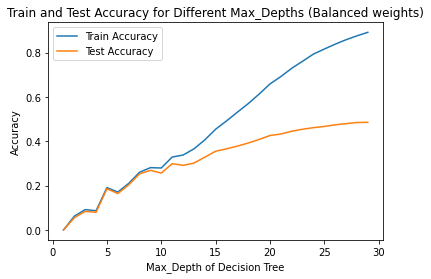

In [76]:
# draw graph
plt.plot(depths, train_error, label='Train Accuracy')
plt.plot(depths, test_error, label='Test Accuracy')
plt.xlabel('Max_Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Accuracy for Different Max_Depths (Balanced weights)')
plt.show()

In [77]:
# generate error graph with x as the max depth (aka model complexity)
train_error = []
test_error = []
depths = []
for depth in range(1, 30):
    depths += [depth]
    # find train error
    mod = DecisionTreeClassifier(criterion='entropy', max_depth=depth, class_weight=None)
    # train
    mod.fit(X_train, y_train)
    # generate predictions on train set
    pred = mod.predict(X_train)
    # find accuracy for train set
    train_error += [accuracy_score(y_train, pred)]
    
    # find test error
    mod = DecisionTreeClassifier(criterion='entropy', max_depth=depth, class_weight=None)
    # train
    mod.fit(X_train, y_train)
    # generate predictions on test set
    pred = mod.predict(X_test)
    # find accuracy for test set
    test_error += [accuracy_score(y_test, pred)]

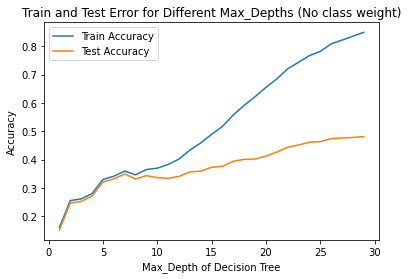

In [78]:
# draw graph
plt.plot(depths, train_error, label='Train Accuracy')
plt.plot(depths, test_error, label='Test Accuracy')
plt.xlabel('Max_Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Error for Different Max_Depths (No class weight)')
plt.show()